In [1]:
# importing liberies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# loading the datasets
geo=pd.read_csv("Geo_scores.csv")
instance=pd.read_csv("instance_scores.csv")
lamda=pd.read_csv("Lambda_wts.csv")
qset=pd.read_csv("Qset_tats.csv")
test=pd.read_csv("test_share.csv")
train=pd.read_csv('train.csv')

In [3]:
# print all datssets shapes
print(geo.shape)
print("**********************")
print(instance.shape)
print("**********************")
print(lamda.shape)
print("**********************")
print(qset.shape)
print("**********************")
print(test.shape)
print("**********************")
print(train.shape)
print("**********************")

(1424035, 2)
**********************
(1424035, 2)
**********************
(1400, 2)
**********************
(1424035, 2)
**********************
(56962, 27)
**********************
(227845, 28)
**********************


In [4]:
print(geo.head(2))
print("**********************")
print(instance.head(2))
print("**********************")
print(lamda.head(2))
print("**********************")
print(qset.head(2))
print("**********************")
print(test.head(2))
print("**********************")
print(train.head(2))
print("**********************")

       id  geo_score
0   26674       4.48
1  204314       4.48
**********************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
**********************
    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
**********************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
**********************
       id   Group      Per1      Per2  Per3      Per4  Per5      Per6  Per7  \
0  146574  Grp229 -0.300000  1.540000  0.22 -0.280000  0.57  0.260000  0.70   
1  268759  Grp141  0.633333  0.953333  0.81  0.466667  0.91  0.253333  1.04   

       Per8  ...      Dem7      Dem8      Dem9     Cred1     Cred2     Cred3  \
0  1.076667  ...  0.786667  0.546667  0.313333  0.703333  0.813333  0.776667   
1  0.550000  ...  0.636667  0.770000  0.993333  0.536667  0.703333  0.806667   

      Cred4     Cred5     Cred6  Normalised_FNT  
0  0.796667  0.823333  0.783333       -249.7500  
1  0.630000  0.673333  0.6

In [5]:
# checking the total unique values using ID and Group columns
print('**********Unique ID to the customer*************')
print("geo",geo['id'].nunique())
print("**********************")
print("instance",instance['id'].nunique())
print("**********************") 
print("qset",qset['id'].nunique())
print("**********************")
print("test",test['id'].nunique())
print("**********************")
print("train",train['id'].nunique())
print("**********************")
print('************ Unique Group to the customer************')
print('lambda',lamda['Group'].nunique())
print("*********************")
print('test',test['Group'].nunique())
print("**********************")
print('train',train['Group'].nunique())
print("**********************")

**********Unique ID to the customer*************
geo 284807
**********************
instance 284807
**********************
qset 284807
**********************
test 56962
**********************
train 227845
**********************
************ Unique Group to the customer************
lambda 1400
*********************
test 915
**********************
train 1301
**********************


In [6]:
# checking the datasets info
print(geo.info())
print("**********************")
print(instance.info())
print("**********************")
print(lamda.info())
print("**********************")
print(qset.info())
print("**********************")
print(test.info())
print("**********************")
print(train.info())
print("**********************")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   

In [7]:
# checking the total datasets having any null values
print(geo.isnull().sum())
print("**********************")
print(instance.isnull().sum())
print("**********************")
print(lamda.isnull().sum())
print("**********************")
print(qset.isnull().sum())
print("**********************")
print(test.isnull().sum())
print("**********************")
print(train.isnull().sum())
print("**********************")

id               0
geo_score    71543
dtype: int64
**********************
id                 0
instance_scores    0
dtype: int64
**********************
Group        0
lambda_wt    0
dtype: int64
**********************
id                           0
qsets_normalized_tat    103201
dtype: int64
**********************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64
**********************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4    

In [8]:
# checking the difference in missing values in geo and qset columns
# len(column_name)--->- the count of missing values in each column is divided by the total number of rows in the dataset dataframe. This calculates the proportion of missing values for each column.
# *100--> The proportion of missing values is multiplied by 100 to convert it into a percentage.
# geo.isnull().sum()/len(geo)*100 --> - This prints the percentage of missing values for each column in the geo dataframe.
print(geo.isnull().sum()/len(geo)*100)
print("**********************")
print(qset.isnull().sum()/len(qset)*100)

id           0.000000
geo_score    5.023964
dtype: float64
**********************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


In [9]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


<Axes: ylabel='geo_score'>

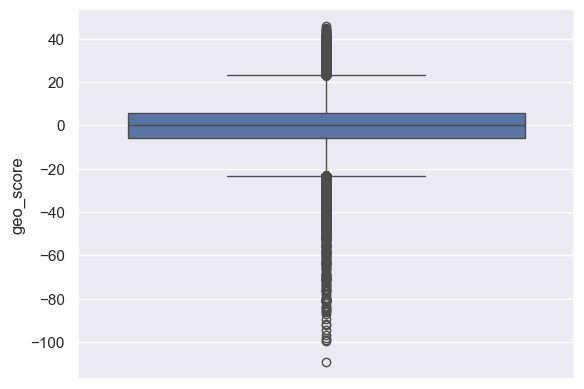

In [10]:
# check any outliers using boxplot
sns.boxplot(y='geo_score',data=geo)

In [11]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


<Axes: ylabel='qsets_normalized_tat'>

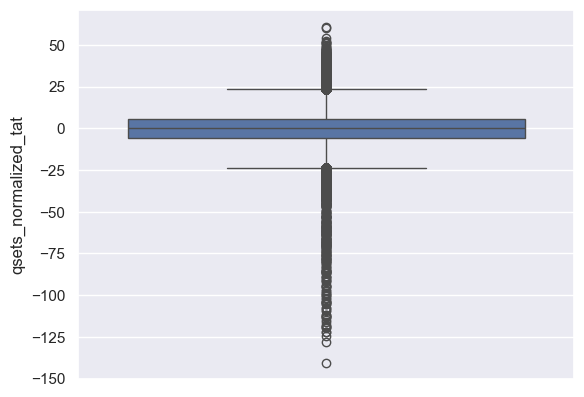

In [12]:
sns.boxplot(y='qsets_normalized_tat',data=qset)

In [13]:
# Filling the missing values using median
geo['geo_score']=geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [14]:
print(geo.isnull().sum()/len(geo)*100)
print("**********************")
print(qset.isnull().sum()/len(qset)*100)

id           0.0
geo_score    0.0
dtype: float64
**********************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


In [15]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,9.034321e-03
std,8.221673e+04,7.628149e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.170000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.170000e+00
max,2.848060e+05,4.581000e+01


In [16]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125


In [17]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.680000,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.716667,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0


In [18]:
train['Target'].value_counts()

Target
0    227451
1       394
Name: count, dtype: int64

In [19]:
# Adding a common table
train['data']='train'
test['data']='test'

In [20]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [21]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test


In [22]:
# add both table together because the total number of unique values are same 
all_data=pd.concat([train,test],axis=0)

In [23]:
all_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test


In [24]:
print('**********Unique ID to the customer*************')
print("geo",geo['id'].nunique())
print("**********************")
print("instance",instance['id'].nunique())
print("**********************") 
print("qset",qset['id'].nunique())
print("**********************")
print("all_data",all_data['id'].nunique())
print("**********************")
print('************ Unique Group to the customer************')
print('lambda',lamda['Group'].nunique())
print("********************")
print('test',test['Group'].nunique())
print("**********************")
print('all_data',all_data['Group'].nunique())
print("**********************")

**********Unique ID to the customer*************
geo 284807
**********************
instance 284807
**********************
qset 284807
**********************
all_data 284807
**********************
************ Unique Group to the customer************
lambda 1400
********************
test 915
**********************
all_data 1400
**********************


In [25]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,9.034321e-03
std,8.221673e+04,7.628149e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.170000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.170000e+00
max,2.848060e+05,4.581000e+01


In [26]:
# it will do for avoiding the blender otherwise its show the error
geo=geo.groupby('id').mean()
instance=instance.groupby('id').mean()
qset=qset.groupby('id').mean()


In [27]:
geo.shape

(284807, 1)

In [28]:
instance.shape

(284807, 1)

In [29]:
qset.shape

(284807, 1)

In [30]:
lamda.shape

(1400, 2)

In [31]:
# merging the all_dataset and lamda 
all_data=pd.merge(all_data,lamda,on='Group',how='left')

In [32]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60


In [33]:
# merging all the dataset and finalize the a singlw dataset
all_data=pd.merge(all_data,geo,on='id',how='left')

In [34]:
all_data=pd.merge(all_data,instance,on='id',how='left')

In [35]:
# an error occur because of the blender
all_data=pd.merge(all_data,qset,on='id',how='left')

In [36]:
all_data.shape

(284807, 33)

In [37]:
all_data['Group'].nunique()

1400

In [38]:
lamda['Group'].nunique()

1400

In [39]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256,-0.06,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250,0.52,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950,1.56,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490,0.70,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850,-0.47,-0.630


In [40]:
train=all_data[all_data['data']=='train']
test=all_data[all_data['data']=='test']

In [41]:
train.shape

(227845, 33)

In [42]:
test.shape

(56962, 33)

In [43]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [44]:
train=train.drop(['id','data'],axis=1) # this is for building a model
test=test.drop(['id','data'],axis=1) # this is for prediction and final result

In [45]:
unseen_test_data=test.copy()

In [46]:
unseen_test_data['Group']=unseen_test_data['Group'].astype('category') # converting category column into integer
unseen_test_data['Group']=unseen_test_data['Group'].cat.codes # the values assigned correspond to unique categories in alphabetical order.
unseen_test_data['Group']

227845    277
227846    180
227847    231
227848    485
227849    504
         ... 
284802     11
284803    569
284804    765
284805    163
284806    222
Name: Group, Length: 56962, dtype: int16

In [47]:
test.isnull().sum()

Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
lambda_wt                   0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
dtype: int64

In [48]:
test=test.drop(['Target'],axis=1)
test.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

In [49]:
train['Group']=train['Group'].astype('category')
train['Group']=train['Group'].cat.codes

In [50]:
# split the data into indep and dep variable
x=train.drop(['Target'],axis=1)
y=train['Target']

In [63]:
train['Target'].value_counts()

Target
0.0    227451
1.0       394
Name: count, dtype: int64

In [65]:
y.value_counts(normalize=True)

Target
0.0    0.998271
1.0    0.001729
Name: proportion, dtype: float64

In [52]:
# split the data into training and spliting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

In [53]:
y_train.value_counts()

Target
0.0    181961
1.0       315
Name: count, dtype: int64

In [54]:
y_test.value_counts()

Target
0.0    45490
1.0       79
Name: count, dtype: int64

In [55]:
# Building a model
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier()
rfmodel.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred_train=rfmodel.predict(x_train)
y_pred_test=rfmodel.predict(x_test)

In [57]:
from sklearn.metrics import classification_report,accuracy_score

In [67]:
print(classification_report(y_train,y_pred_train))
print("*******************")
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

*******************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.70      0.80        79

    accuracy                           1.00     45569
   macro avg       0.97      0.85      0.90     45569
weighted avg       1.00      1.00      1.00     45569



In [69]:
print(accuracy_score(y_train,y_pred_train))
print("*******************")
print(accuracy_score(y_test,y_pred_test))

0.9999945138142158
*******************
0.9994074919353069


In [71]:
final_output = rfmodel.predict(unseen_test_data.drop(columns=['Target']))

In [73]:
final_output

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
final_output=pd.DataFrame(final_output)
final_output.columns

RangeIndex(start=0, stop=1, step=1)

In [77]:
final_output.to_csv("Final_Target_Value.csv")